<a href="https://colab.research.google.com/github/Marcin19721205/IntroductionToBigDataWSB/blob/main/Zadanie_nr10_MJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#stack
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3)
np.random.seed(42)

In [3]:
df = pd.read_csv("/content/sample_data/mtcars_data.csv")

print(df.head())
print(df.info())

    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
0  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4
1  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4
2  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4     1
3  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3     1
4  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3     2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(


   Regresja rząd = 1
R2       : 0.8131
MSE      : 6.3510
Predykcja mpg dla zadania [disp=120, hp=90, wt=3.5]: 20.6519
Bias (intercept_): 19.936363636363634
Liczba cech po rozszerzeniu poly: 3

   Regresja rząd = 2
R2       : 0.7559
MSE      : 8.2955
Predykcja mpg dla zadania [disp=120, hp=90, wt=3.5]: 23.5597
Bias (intercept_): 17.637670256969876
Liczba cech po rozszerzeniu poly: 9

   Regresja rząd = 3
R2       : -2757.4581
MSE      : 93749.2340
Predykcja mpg dla zadania [disp=120, hp=90, wt=3.5]: 22.4950
Bias (intercept_): 14.079521239020842
Liczba cech po rozszerzeniu poly: 19

   Regresja rząd = 4
R2       : -17.6344
MSE      : 633.3115
Predykcja mpg dla zadania [disp=120, hp=90, wt=3.5]: 26.8143
Bias (intercept_): 21.251159689345624
Liczba cech po rozszerzeniu poly: 34


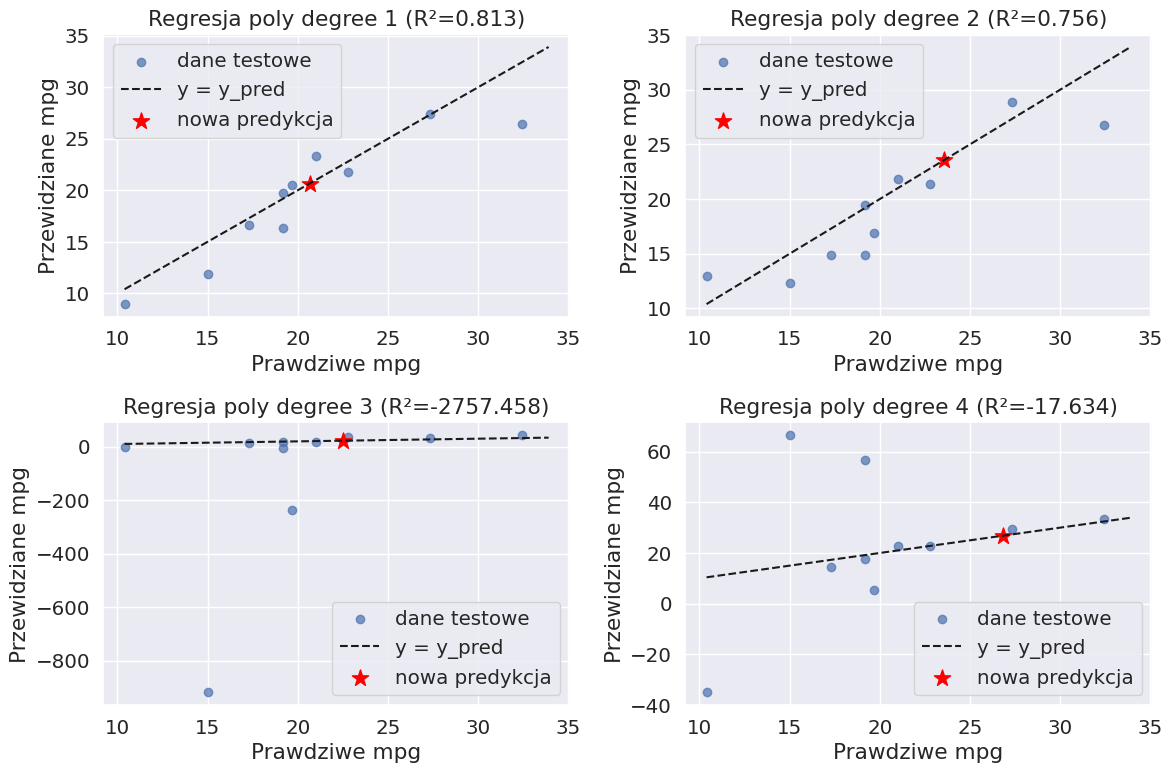


=== PODSUMOWANIE MODELI (1..4) ===
   degree           R2           MSE  prediction_mpg_disp120_hp90_wt3.5
0       1     0.813130      6.350994                          20.651886
1       2     0.755916      8.295463                          23.559666
2       3 -2757.458133  93749.233963                          22.494967
3       4   -17.634426    633.311473                          26.814328


In [9]:
#stack
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error


# mpg ~ disp + hp + wt
X = df[['disp', 'hp', 'wt']].values
y = df['mpg'].values

# test/train
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ZADANIE - PRÓBKA
X_new = np.array([[120, 90, 3.5]])  # [disp, hp, wt]

#trening
def train_poly_model(degree): #funkcja trenująca
    model = Pipeline([
        ('scaler', StandardScaler()), #normalizacja
        ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
        ('reg', LinearRegression())
    ])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_new = model.predict(X_new)[0]

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"\n==============================")
    print(f"   Regresja rząd = {degree}")
    print(f"==============================")
    print(f"R2       : {r2:.4f}")
    print(f"MSE      : {mse:.4f}")
    print(f"Predykcja mpg dla zadania [disp=120, hp=90, wt=3.5]: {y_new:.4f}")
    print("Bias (intercept_):", model.named_steps['reg'].intercept_)
    print("Liczba cech po rozszerzeniu poly:",
          model.named_steps['poly'].n_output_features_)

    return {
        "degree": degree,
        "model": model,
        "y_pred": y_pred,
        "y_new": y_new,
        "r2": r2,
        "mse": mse
    }

#definicja rzędów regresji
degrees = [1, 2, 3, 4]
results = {}

for d in degrees: #trenuj rzędfy
    results[d] = train_poly_model(d)

#wykres
plt.figure(figsize=(12, 8))

y_min = y.min()
y_max = y.max()

for idx, d in enumerate(degrees, start=1):
    res = results[d]
    y_pred = res["y_pred"]
    y_new = res["y_new"]

    plt.subplot(2, 2, idx)
    # punkty testowe
    plt.scatter(y_test, y_pred, alpha=0.7, label='dane testowe')
    # wpasowanie
    plt.plot([y_min, y_max], [y_min, y_max], 'k--', label='y = y_pred')
    # nowa predykcja gwiazdka *
    plt.scatter([y_new], [y_new], s=150, marker='*', c='red',
                label='nowa predykcja')

    plt.title(f'Regresja poly degree {d} (R²={res["r2"]:.3f})')
    plt.xlabel("Prawdziwe mpg")
    plt.ylabel("Przewidziane mpg")
    plt.legend()

plt.tight_layout()
plt.show()

#Podsumowanie
summary_rows = []
for d in degrees:
    res = results[d]
    summary_rows.append({
        "degree": d,
        "R2": res["r2"],
        "MSE": res["mse"],
        "prediction_mpg_disp120_hp90_wt3.5": res["y_new"]
    })

summary_df = pd.DataFrame(summary_rows)
print("\n=== PODSUMOWANIE MODELI (1..4) ===")
print(summary_df)
